In [ ]:
# !pip install plotnine

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles

### Wygenerownie zbioru danych

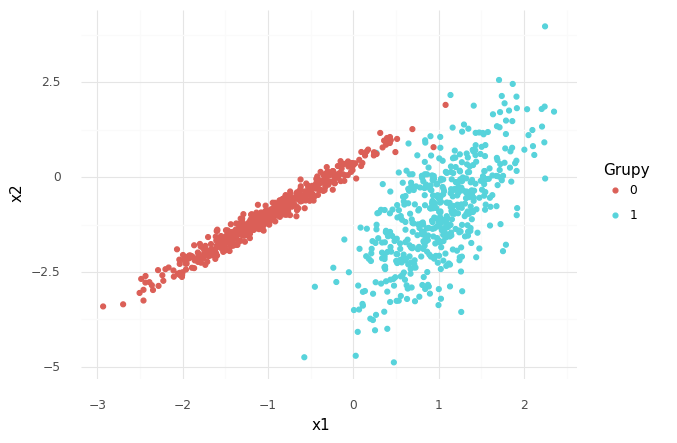

<ggplot: (8763945432825)>

In [ ]:
n = 1000
X, y = make_classification(n_samples=n,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=4)

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['Grupy'] = y

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(Grupy)')) +
 geom_point()+
 theme_minimal()+
 labs(color = 'Grupy'))

## Grupowanie za pomocą *k*-średnich

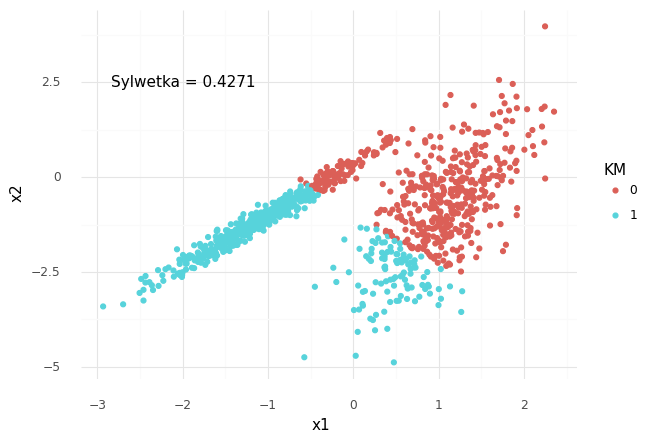

<ggplot: (8763945294449)>

In [ ]:
km = KMeans(n_clusters=2).fit(df[['x1', 'x2']])

df['klastry_km'] = km.labels_
sylwetka_km = round(silhouette_score(df[['x1', 'x2']], km.labels_), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klastry_km)')) +
 geom_point()+
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_km}')+
 theme_minimal()+
 labs(color = 'KM'))

## Grupowanie za pomocą GMM

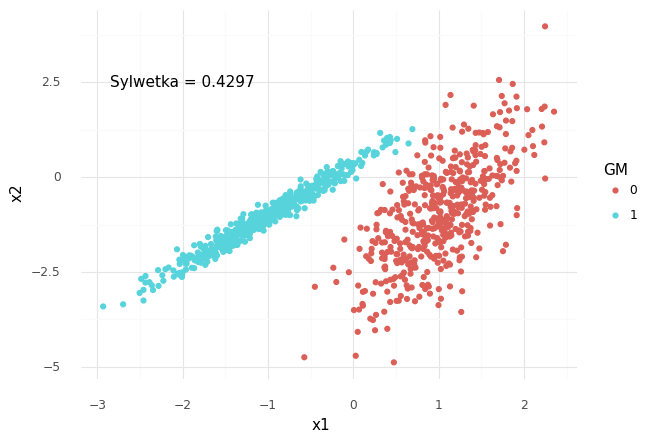

<ggplot: (8763941948593)>

In [ ]:
gm = GaussianMixture(n_components=2).fit(df[['x1', 'x2']])

df['klastry_gm'] = gm.predict(df[['x1', 'x2']])
sylwetka_gm = round(silhouette_score(df[['x1', 'x2']], gm.predict(df[['x1', 'x2']])), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klastry_gm)')) +
 geom_point()+
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(color = 'GM'))

## Grupowanie za pomocą DBSCAN

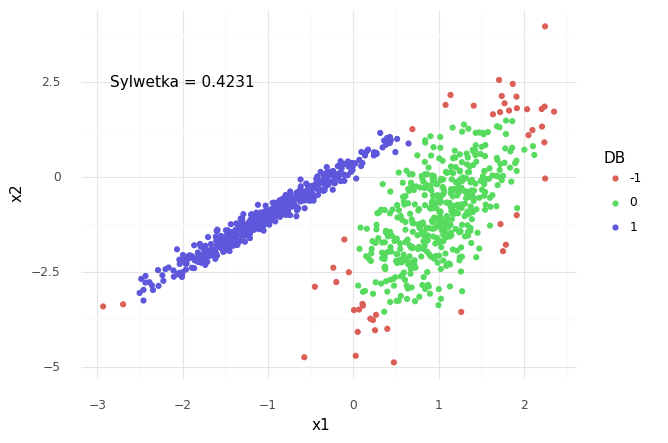

<ggplot: (8763985745481)>

In [ ]:
db = DBSCAN(eps=0.3, min_samples=9).fit(df[['x1', 'x2']])

df['klastry_db'] = db.labels_
sylwetka_db = round(silhouette_score(df[['x1', 'x2']], db.labels_), 4)

(ggplot(df, aes(x = 'x1', y = 'x2', color = 'factor(klastry_db)')) +
 geom_point()+
 annotate('text', x = -2, y = 2.5, label = f'Sylwetka = {sylwetka_db}')+
 theme_minimal()+
 labs(color = 'DB'))

## Analiza segmentów dla zbioru `Auta`

In [3]:
df = pd.read_csv("auta.csv", index_col=0)

In [ ]:
df.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1


In [4]:
from sklearn.preprocessing import StandardScaler

z = StandardScaler()

auta = df.copy()

auta[auta.columns] = z.fit_transform(df[df.columns])

## Grupowanie metodą *k*-means

In [5]:
km = KMeans(n_clusters=3).fit(auta)

auta['klastry'] = km.labels_
df['klastry'] = km.labels_

### Interpretacja wyników

Segmentacja

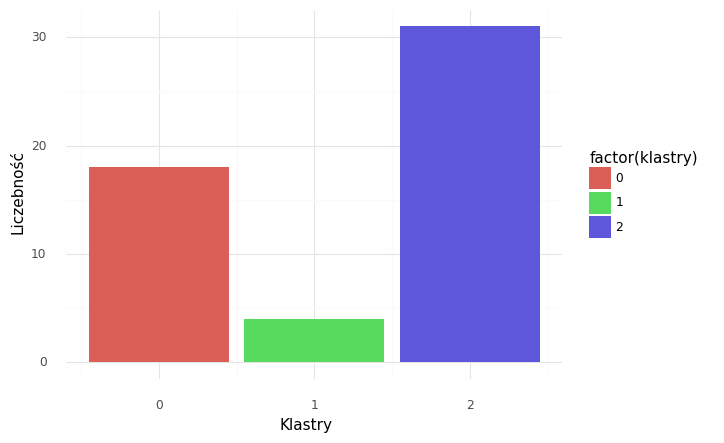

<ggplot: (8763937601565)>

In [ ]:
(ggplot(auta, aes(x = 'klastry', fill = 'factor(klastry)'))+
 geom_bar()+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność'))

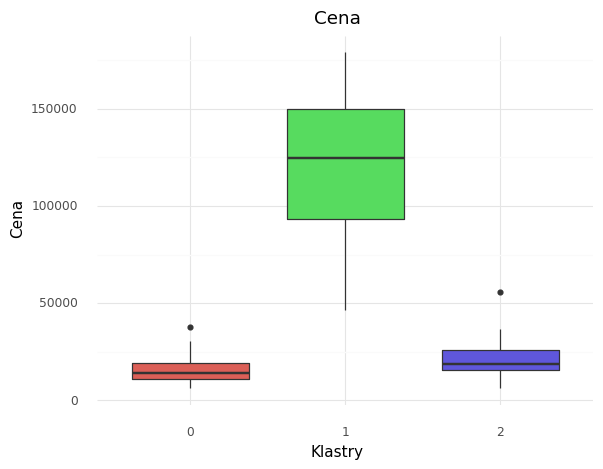

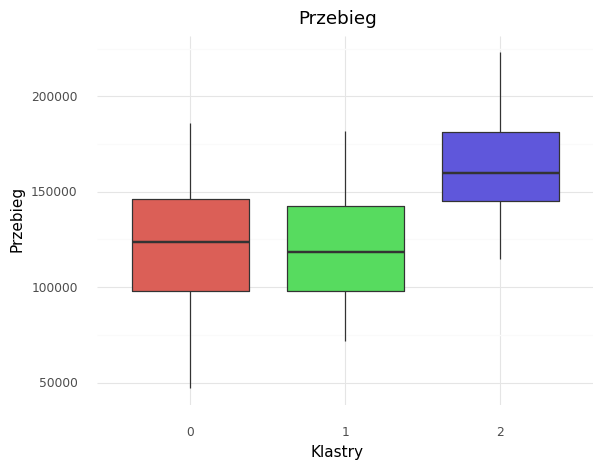

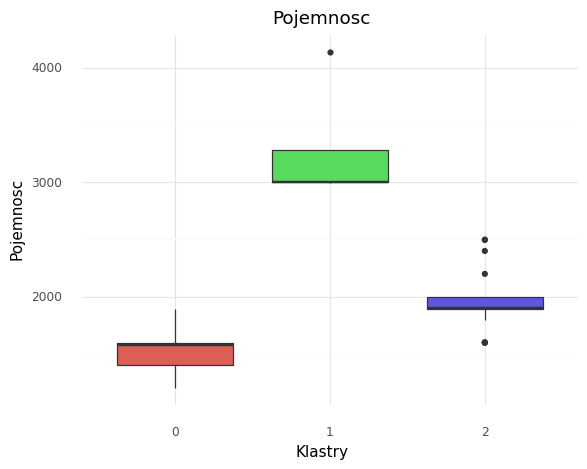

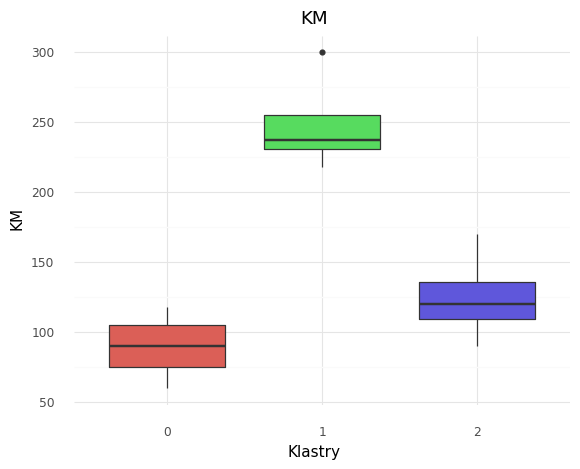

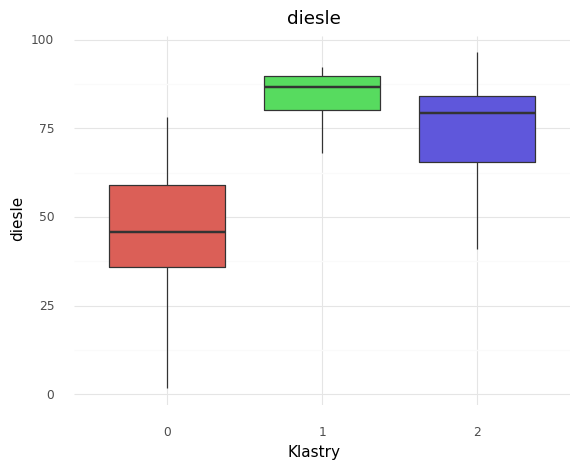

In [ ]:
for zm in df.columns[:-1]:
  print(ggplot(df, aes(x = 'factor(klastry)', y = zm, fill = 'factor(klastry)'))+
    geom_boxplot(show_legend = False)+
    theme_minimal()+
    labs(x = 'Klastry', title = zm))

*grupa0* charakteryzuje się: ...

*grupa1* charakteryzuje się: ...

*grupa2* charakteryzuje się: ...

In [8]:
auta_tidy = auta.reset_index()
auta_tidy.rename({'index': 'Nazwy'},axis=1, inplace=True)
auta_tidy = pd.melt(auta_tidy.reset_index(),
               id_vars=['klastry', 'Nazwy'], value_vars=['Cena', 'Przebieg', 'Pojemnosc', 'KM', 'diesle'],
               value_name='dane')
auta_tidy['Marka'] = auta_tidy.Nazwy.apply(lambda x: x.split(' ')[0])

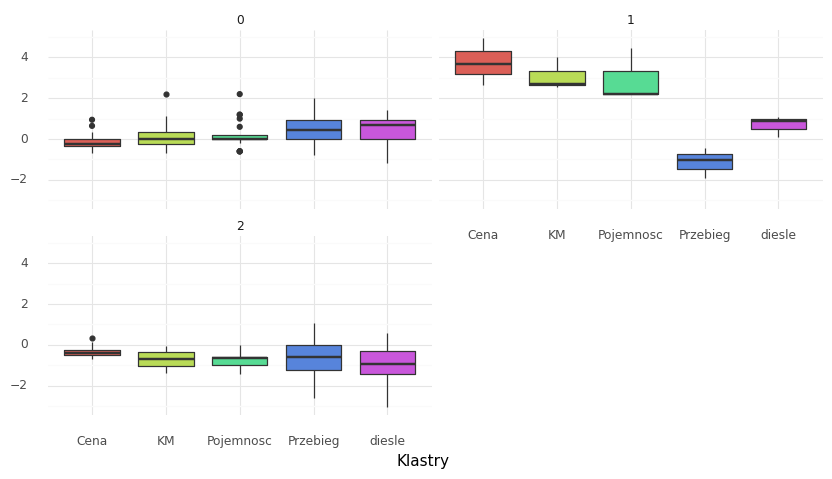

<ggplot: (8732113205501)>

In [10]:
(ggplot(auta_tidy, aes(x = "factor(variable)", y = 'dane', fill = "factor(variable)")) +
    geom_boxplot(show_legend=False) + 
    facet_wrap( 'klastry', ncol=2) +
    theme_minimal() + 
    theme(figure_size=(10, 5))+
    labs(x = 'Klastry', y = ''))